In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Reading

In [2]:
data = pd.read_csv("train.csv")
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
data.shape

(45593, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [5]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [6]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

# Data Cleaning

In [7]:
'''
Remove "min" string from target variable and get numerical target
'''

data["Time_taken(min)"] = data["Time_taken(min)"].apply(lambda x: x[len("(min) "):]).astype(int)
data.rename(columns={"Time_taken(min)" : "delivery_time_taken"},inplace=True)

In [8]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [9]:
city=[]
code=[]
for i in data["Delivery_person_ID"]:
    city.append(i.split("RES")[0])
    code.append(i.split("RES")[1])
data["City_Name"]=city
data["City_Code"]=code 

In [10]:
data.drop(columns="Delivery_person_ID",axis=1,inplace=True)

In [11]:
data.drop(columns="ID",axis=1,inplace=True)

In [12]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time_taken,City_Name,City_Code
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,INDO,13DEL02
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,BANG,18DEL02
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,BANG,19DEL01
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,COIMB,13DEL02
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,CHEN,12DEL01


In [13]:
data.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)

In [14]:
data["Weather_conditions"].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [15]:
'''
Remove "conditions" string from weather conditions feature and convert string "NaN" values to np.nan
'''
data["Weather_conditions"] = data["Weather_conditions"].apply(lambda x: x[len("conditions "):])

In [16]:
data["Weather_conditions"].replace("NaN", np.nan, inplace=True)

In [17]:
print(data["Road_traffic_density"].unique())

['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']


In [18]:
'''
It seems "NaN" strings have a space after them, convert both "NaN " and "NaN" to object Null values
'''

data.replace("NaN ", np.nan, inplace=True)
data.replace("NaN", np.nan, inplace=True)

data.isna().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
delivery_time_taken               0
City_Name                         0
City_Code                         0
dtype: int64

In [19]:
for i in data.columns:
    data[i].replace("NaN ",np.nan,inplace=True)
    data[i].replace("NaN",np.nan,inplace=True)

In [20]:
data.isna().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
delivery_time_taken               0
City_Name                         0
City_Code                         0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  object 
 1   Delivery_person_Ratings      43685 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weather_conditions           44977 non-null  object 
 10  Road_traffic_density         44992 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [22]:
data["Delivery_person_Ratings"]=data["Delivery_person_Ratings"].astype("float")
data["Delivery_person_Age"]=pd.to_numeric(data["Delivery_person_Age"])

In [23]:
data['multiple_deliveries'] = data['multiple_deliveries'].astype('float64')

In [24]:
data["Vehicle_condition"]=data["Vehicle_condition"].astype("object")

In [25]:
data['Order_Date']=pd.to_datetime(data['Order_Date'],format="%d-%m-%Y")

In [26]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time_taken,City_Name,City_Code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,13DEL02
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,18DEL02
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,19DEL01
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,13DEL02
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,12DEL01


In [27]:
data.shape

(45593, 20)

In [28]:
#Check for Duplicate Values
if (len(data[data.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


# Handelling the Missing values

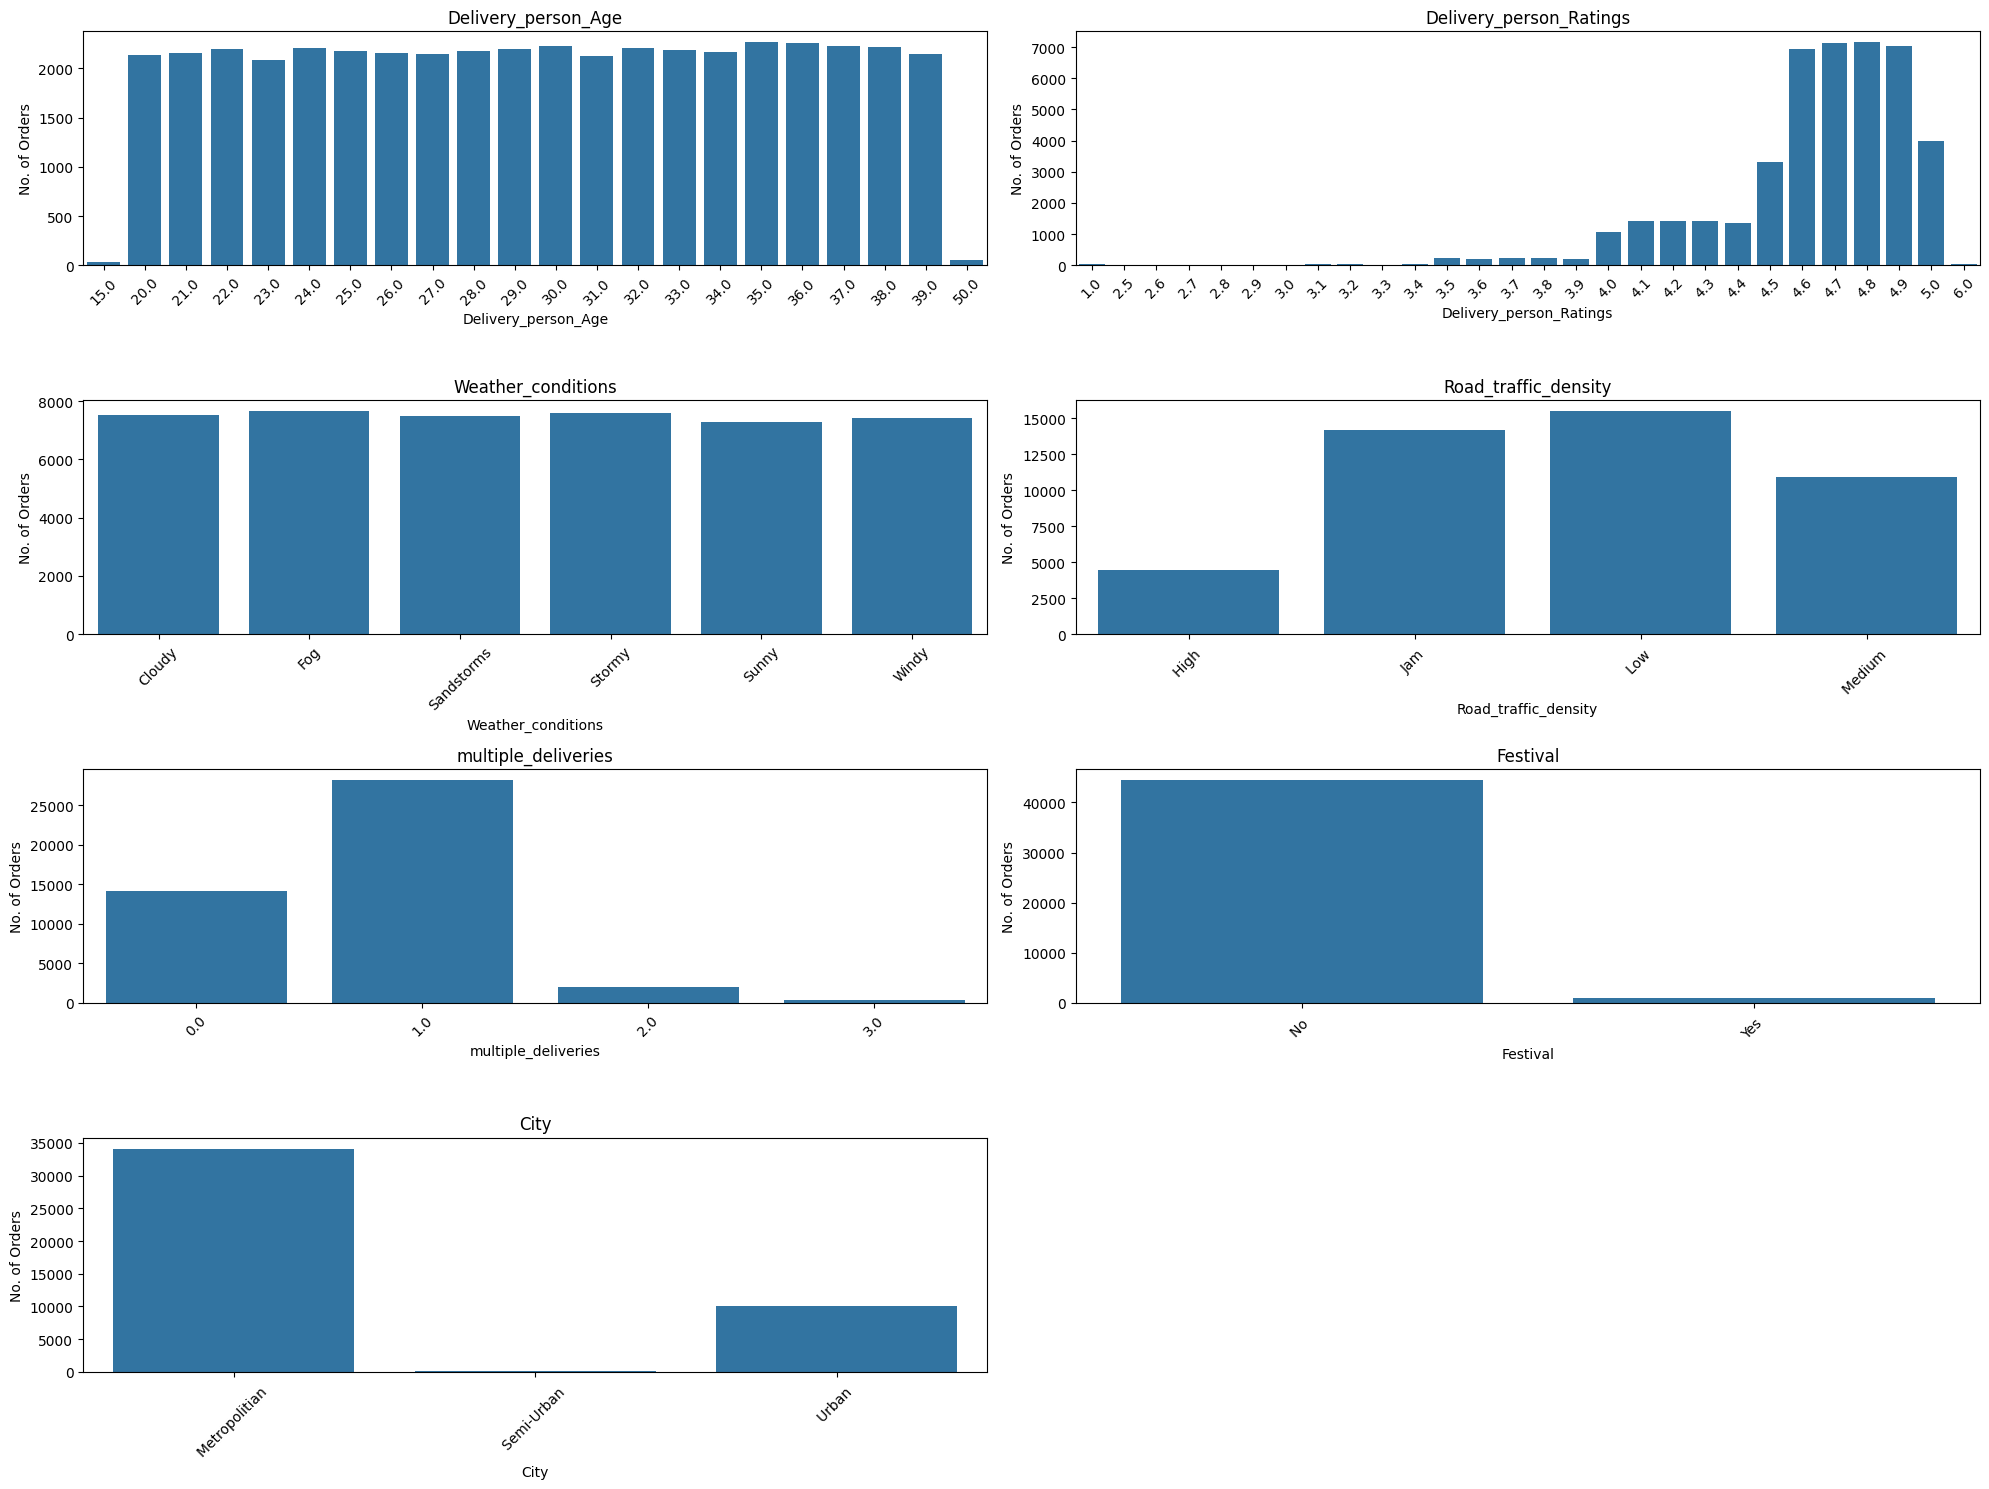

In [29]:
#Data Visualisation
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=data, x=column_name, order=data[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [30]:
data['Delivery_person_Age'].fillna(np.random.choice(data['Delivery_person_Age']), inplace=True)
data['Weather_conditions'].fillna(np.random.choice(data['Weather_conditions']), inplace=True)

In [31]:
data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].median(), inplace=True)

In [32]:
data['City'].fillna(data['City'].mode()[0], inplace=True)
data['Festival'].fillna(data['Festival'].mode()[0], inplace=True)
data['multiple_deliveries'].fillna(data['multiple_deliveries'].mode()[0], inplace=True)
data['Road_traffic_density'].fillna(data['Road_traffic_density'].mode()[0], inplace=True)

In [33]:
data.isna().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
delivery_time_taken               0
City_Name                         0
City_Code                         0
dtype: int64

In [34]:
data["Time_Orderd"] =data["Time_Orderd"].fillna(data["Time_Order_picked"])

# Feature Engineering

In [35]:
import geopy.distance

In [36]:
coord_features = [
        "Restaurant_latitude", 
        "Restaurant_longitude", 
        "Delivery_location_latitude", 
        "Delivery_location_longitude"
        ]

In [37]:
def calculate_dist(la1,lo1,la2,lo2):

        '''
        Calculate distance between restaurants and delivery points by using coordinates
        '''

        return geopy.distance.geodesic((abs(la1),abs(lo1)), (abs(la2),abs(lo2))).km

data["distance"] = data[coord_features].apply(lambda x: calculate_dist(*x), axis=1)

In [38]:
data.drop(coord_features, axis=1, inplace=True)

In [39]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time_taken,City_Name,City_Code,distance
0,37.0,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,13DEL02,3.020737
1,34.0,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,18DEL02,20.143737
2,23.0,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,19DEL01,1.549693
3,38.0,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,13DEL02,7.774497
4,32.0,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,12DEL01,6.197898


In [40]:
def calculate_time_diff(df):
    # Ensure Order_Date is datetime
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    
    # Convert time columns to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    # Calculate the correct picked time considering the next day condition
    df['Time_Order_picked_formatted'] = df['Order_Date'] + df['Time_Order_picked']
    next_day_mask = df['Time_Order_picked'] < df['Time_Orderd']
    df.loc[next_day_mask, 'Time_Order_picked_formatted'] += pd.DateOffset(days=1)
    
    # Calculate ordered time
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    
    # Calculate the difference in minutes
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Drop the temporary columns
    df.drop(['Time_Ordered_formatted', 'Time_Order_picked_formatted'], axis=1, inplace=True)
    
    return df

In [41]:
result = calculate_time_diff(data)

In [42]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time_taken,City_Name,City_Code,distance,order_prepare_time
0,37.0,4.9,2022-03-19,0 days 11:30:00,0 days 11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,13DEL02,3.020737,15.0
1,34.0,4.5,2022-03-25,0 days 19:45:00,0 days 19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,18DEL02,20.143737,5.0
2,23.0,4.4,2022-03-19,0 days 08:30:00,0 days 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,19DEL01,1.549693,15.0
3,38.0,4.7,2022-04-05,0 days 18:00:00,0 days 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,13DEL02,7.774497,10.0
4,32.0,4.6,2022-03-26,0 days 13:30:00,0 days 13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,12DEL01,6.197898,15.0


In [43]:
data['order_prepare_time'].fillna(data['order_prepare_time'].median(), inplace=True)

In [44]:
data.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Order_Date                 0
Time_Orderd                0
Time_Order_picked          0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
delivery_time_taken        0
City_Name                  0
City_Code                  0
distance                   0
order_prepare_time         0
dtype: int64

In [45]:
data["is_weekend"] = data["Order_Date"].dt.day_of_week > 4

In [46]:
data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)

In [47]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

data["order_datetime"] = pd.to_datetime(data["Order_Date"]  + data["Time_Orderd"], dayfirst=True)
data["picked_datetime"] = pd.to_datetime(data["Order_Date"]  + data["Time_Order_picked"], dayfirst=True)

data = data.drop(["Time_Orderd", "Time_Order_picked"], axis=1)

data["ordered_hour"] = data["order_datetime"].apply(lambda x: x.hour)
data["ordered_min"] = data["order_datetime"].apply(lambda x: x.minute)


In [48]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,...,City_Name,City_Code,distance,order_prepare_time,is_weekend,day_of_week,order_datetime,picked_datetime,ordered_hour,ordered_min
0,37.0,4.9,2022-03-19,Sunny,High,2,Snack,motorcycle,0.0,No,...,INDO,13DEL02,3.020737,15.0,True,5,2022-03-19 11:30:00,2022-03-19 11:45:00,11,30
1,34.0,4.5,2022-03-25,Stormy,Jam,2,Snack,scooter,1.0,No,...,BANG,18DEL02,20.143737,5.0,False,4,2022-03-25 19:45:00,2022-03-25 19:50:00,19,45
2,23.0,4.4,2022-03-19,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,...,BANG,19DEL01,1.549693,15.0,True,5,2022-03-19 08:30:00,2022-03-19 08:45:00,8,30
3,38.0,4.7,2022-04-05,Sunny,Medium,0,Buffet,motorcycle,1.0,No,...,COIMB,13DEL02,7.774497,10.0,False,1,2022-04-05 18:00:00,2022-04-05 18:10:00,18,0
4,32.0,4.6,2022-03-26,Cloudy,High,1,Snack,scooter,1.0,No,...,CHEN,12DEL01,6.197898,15.0,True,5,2022-03-26 13:30:00,2022-03-26 13:45:00,13,30


In [49]:
data.ordered_hour.unique()

array([11, 19,  8, 18, 13, 21, 17, 20, 14,  9, 22, 12, 23, 10, 16, 15,  0],
      dtype=int64)

In [50]:
data.shape

(45593, 22)

In [51]:
num=data.select_dtypes(include=np.number).columns
cat = data.select_dtypes(include=object).columns

In [52]:
cat.shape

(9,)

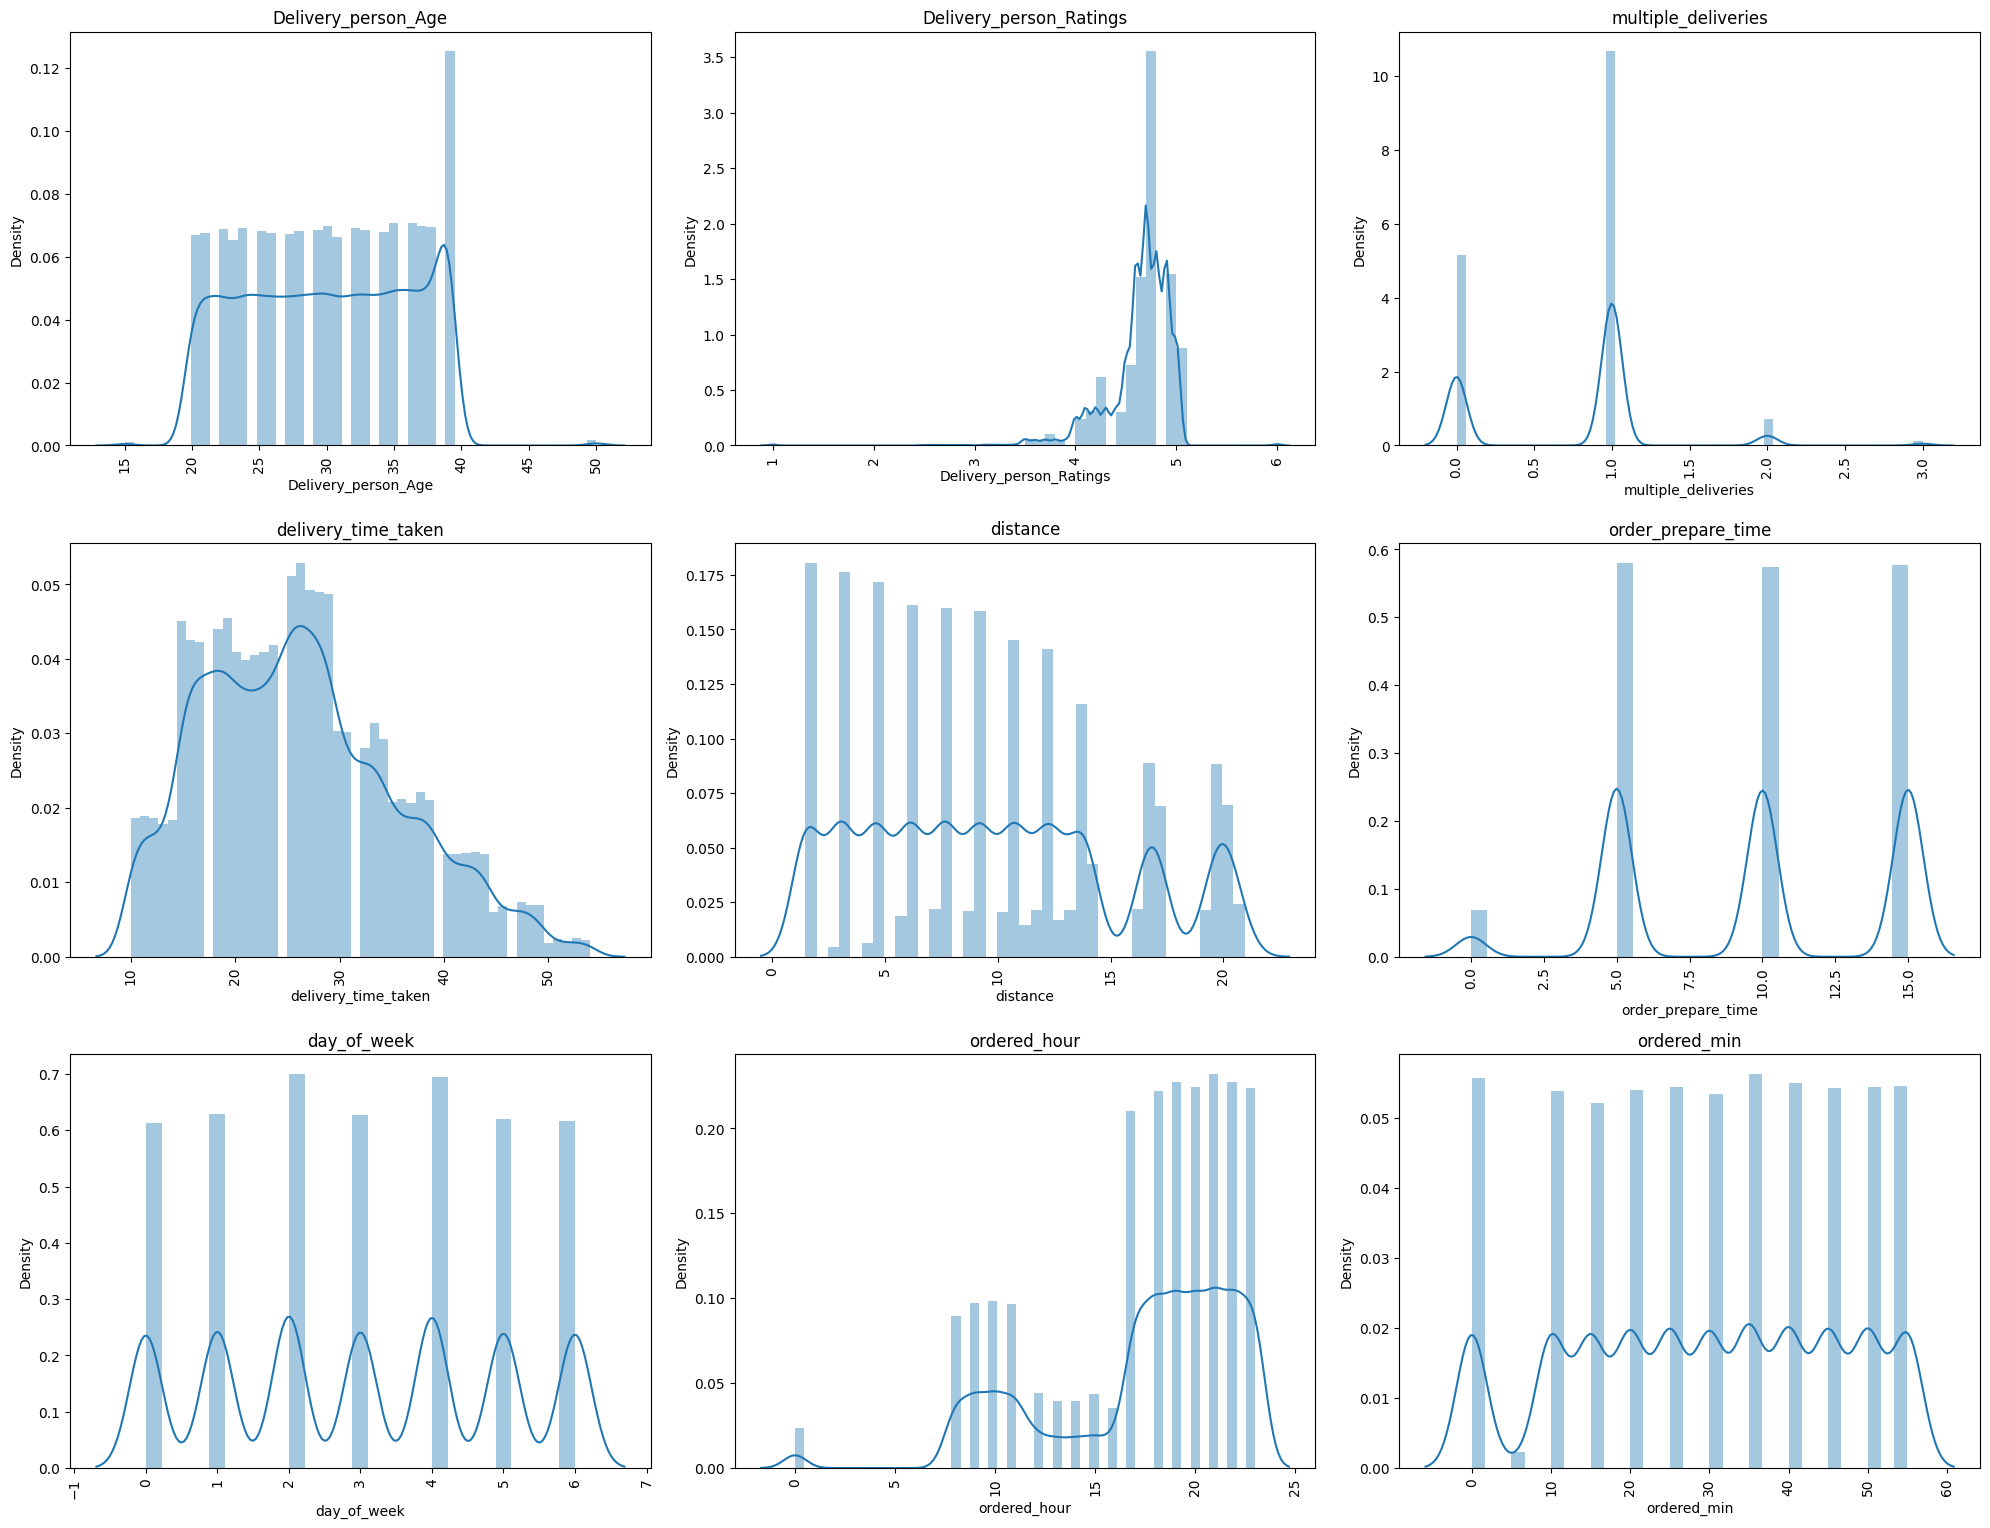

In [53]:
a=4
b=3
c=1
plt.figure(figsize=(20,20))
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(data[i])
    plt.title(i)
    plt.xticks(rotation=90)
    c=c+1
plt.tight_layout()
plt.show()

In [54]:
variables_df = data.copy()

In [55]:
variables_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_Age      45593 non-null  float64       
 1   Delivery_person_Ratings  45593 non-null  float64       
 2   Order_Date               45593 non-null  datetime64[ns]
 3   Weather_conditions       45593 non-null  object        
 4   Road_traffic_density     45593 non-null  object        
 5   Vehicle_condition        45593 non-null  object        
 6   Type_of_order            45593 non-null  object        
 7   Type_of_vehicle          45593 non-null  object        
 8   multiple_deliveries      45593 non-null  float64       
 9   Festival                 45593 non-null  object        
 10  City                     45593 non-null  object        
 11  delivery_time_taken      45593 non-null  int32         
 12  City_Name                45593 n

In [56]:
variables_df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,multiple_deliveries,delivery_time_taken,distance,order_prepare_time,day_of_week,order_datetime,picked_datetime,ordered_hour,ordered_min
count,45593.000000,45593.000000,45593,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593,45593.000000,45593.000000
mean,29.950716,4.636552,2022-03-13 16:32:53.987235072,0.750225,26.294607,9.718922,9.610138,2.997675,2022-03-14 10:26:49.536551424,2022-03-14 10:10:11.376746496,17.407102,29.499704
min,15.000000,1.000000,2022-02-11 00:00:00,0.000000,10.000000,1.463837,0.000000,0.000000,2022-02-11 00:00:00,2022-02-11 00:00:00,0.000000,0.000000
25%,25.000000,4.600000,2022-03-04 00:00:00,0.000000,19.000000,4.654040,5.000000,1.000000,2022-03-04 23:00:00,2022-03-04 23:00:00,15.000000,15.000000
50%,30.000000,4.700000,2022-03-15 00:00:00,1.000000,26.000000,9.203840,10.000000,3.000000,2022-03-15 16:50:00,2022-03-15 16:50:00,19.000000,30.000000
75%,35.000000,4.800000,2022-03-27 00:00:00,1.000000,32.000000,13.660197,15.000000,5.000000,2022-03-27 18:15:00,2022-03-27 18:05:00,21.000000,45.000000
max,50.000000,6.000000,2022-04-06 00:00:00,3.000000,54.000000,20.942906,15.000000,6.000000,2022-04-06 23:55:00,2022-04-06 23:55:00,23.000000,55.000000
std,5.992670,0.327906,NaN,0.567430,9.383806,5.599119,4.440525,1.969720,NaN,NaN,4.846890,16.652575


In [57]:
target = "delivery_time_taken"
numerical_features = ["Delivery_person_Age", "Delivery_person_Ratings", "distance", "order_prepare_time","day_of_week","ordered_hour"	,"ordered_min"]

categorical_features = list(variables_df.drop(columns=numerical_features + [target], axis=1).columns)

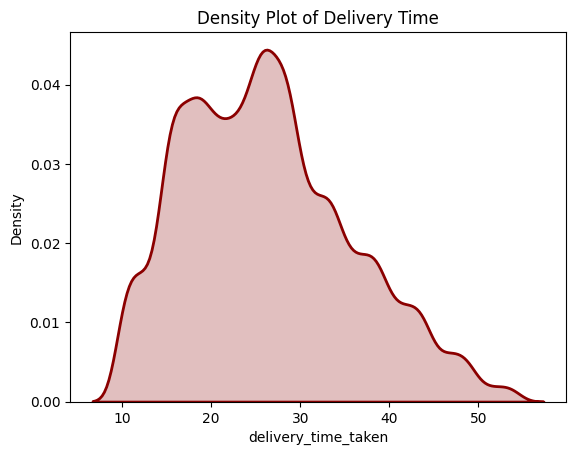

In [58]:
sns.kdeplot(data=variables_df, x=target, shade=True, color="darkred", lw=2)
plt.title("Density Plot of Delivery Time")
plt.show()

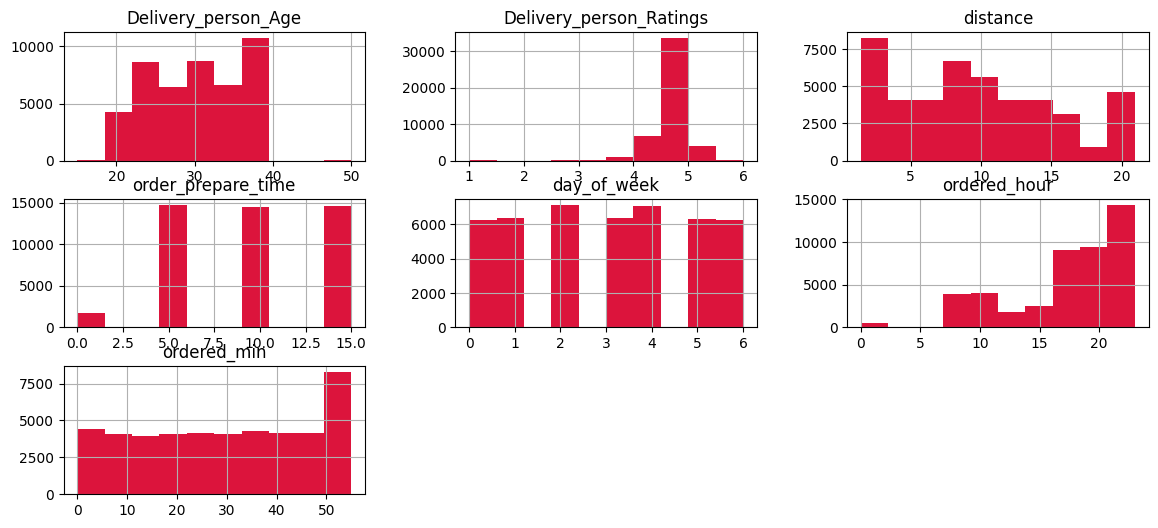

In [59]:
variables_df[numerical_features].hist(layout=(3,3), figsize=(14,6), color="crimson")
plt.show()

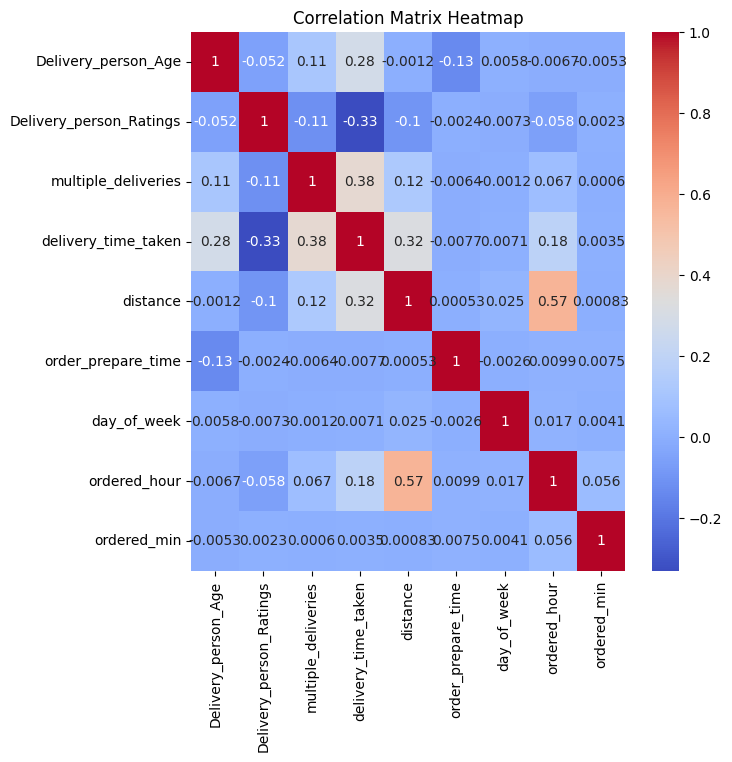

In [60]:
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [61]:
data.order_prepare_time.unique()

array([15.,  5., 10.,  0.])

# Data Preprocessing & Splitting

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(data)

In [64]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,...,City_Name,City_Code,distance,order_prepare_time,is_weekend,day_of_week,order_datetime,picked_datetime,ordered_hour,ordered_min
0,37.0,4.9,2022-03-19,4,0,2,3,2,0.0,0,...,10,37,3.020737,15.0,True,5,2022-03-19 11:30:00,2022-03-19 11:45:00,11,30
1,34.0,4.5,2022-03-25,3,1,2,3,3,1.0,0,...,3,52,20.143737,5.0,False,4,2022-03-25 19:45:00,2022-03-25 19:50:00,19,45
2,23.0,4.4,2022-03-19,2,2,0,1,2,1.0,0,...,3,54,1.549693,15.0,True,5,2022-03-19 08:30:00,2022-03-19 08:45:00,8,30
3,38.0,4.7,2022-04-05,4,3,0,0,2,1.0,0,...,6,37,7.774497,10.0,False,1,2022-04-05 18:00:00,2022-04-05 18:10:00,18,0
4,32.0,4.6,2022-03-26,0,0,1,3,3,1.0,0,...,5,33,6.197898,15.0,True,5,2022-03-26 13:30:00,2022-03-26 13:45:00,13,30


In [65]:
data = data.drop(["order_datetime","picked_datetime", "Order_Date", "City_Code"], axis=1)

In [66]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time_taken,City_Name,distance,order_prepare_time,is_weekend,day_of_week,ordered_hour,ordered_min
0,37.0,4.9,4,0,2,3,2,0.0,0,2,24,10,3.020737,15.0,True,5,11,30
1,34.0,4.5,3,1,2,3,3,1.0,0,0,33,3,20.143737,5.0,False,4,19,45
2,23.0,4.4,2,2,0,1,2,1.0,0,2,26,3,1.549693,15.0,True,5,8,30
3,38.0,4.7,4,3,0,0,2,1.0,0,0,21,6,7.774497,10.0,False,1,18,0
4,32.0,4.6,0,0,1,3,3,1.0,0,0,30,5,6.197898,15.0,True,5,13,30


In [67]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

In [68]:
X = data.drop('delivery_time_taken', axis=1)  # Features
y = data['delivery_time_taken']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [70]:
rf_model=rf.fit(X_train,y_train)

In [71]:
rf_pred=rf_model.predict(X_test)

In [72]:
from sklearn.metrics import r2_score,mean_squared_error

In [73]:
rf_r2=r2_score(y_test,rf_pred)
print(rf_r2)
rf_mse=mean_squared_error(y_test,rf_pred)
print(rf_mse)

0.8165918967437777
16.08088075446869


In [74]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [75]:
dt_model=dt.fit(X_train,y_train)

In [76]:
dt_pred=dt_model.predict(X_test)

In [77]:
dt_r2=r2_score(y_test,dt_pred)
print(dt_r2)
dt_mse=mean_squared_error(y_test,dt_pred)
print(dt_mse)

0.6553217367916918
30.22074788902292


In [78]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()


In [79]:
ab_model=ab.fit(X_train,y_train)

In [80]:
ab_pred=ab_model.predict(X_test)

In [81]:
ab_r2=r2_score(y_test,ab_pred)
print(ab_r2)
ab_mse=mean_squared_error(y_test,ab_pred)
print(ab_mse)

0.6214428538388341
33.19118522078255


In [82]:
#GradientBoost Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb_model=gb.fit(X_train,y_train)

In [84]:
gb_pred=gb_model.predict(X_test)

In [85]:
gb_r2=r2_score(y_test,gb_pred)
print(gb_r2)
gb_mse=mean_squared_error(y_test,gb_pred)
print(gb_mse)

0.7724567648824064
19.950566880353563


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

In [88]:
#KNN Regressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn_model=knn.fit(X_train,y_train)

In [90]:
knn_pred=knn_model.predict(X_test)

In [91]:
knn_r2=r2_score(y_test,knn_pred)
print(knn_r2)
knn_mse=mean_squared_error(y_test,knn_pred)
print(knn_mse)

0.581386340103373
36.703265708959314


In [92]:
#Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [94]:
lr_model=lr.fit(X_train,y_train)

In [95]:
lr_pred=knn_model.predict(X_test)

In [96]:
lr_r2=r2_score(y_test,lr_pred)
print(lr_r2)
lr_mse=mean_squared_error(y_test,lr_pred)
print(lr_mse)

0.581386340103373
36.703265708959314


In [97]:
# XGBOOST

In [98]:
import xgboost as xgb

In [99]:
xgb_=xgb.XGBRegressor()

In [100]:
xgb_model=xgb_.fit(X_train,y_train)

In [101]:
xgb_pred=knn_model.predict(X_test)

In [102]:
xgb_r2=r2_score(y_test,xgb_pred)
print(xgb_r2)
xgb_mse=mean_squared_error(y_test,xgb_pred)
print(xgb_mse)

0.581386340103373
36.703265708959314


# Conclusion

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

In [105]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

In [106]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [107]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}


In [108]:
# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)

In [109]:
# Calculate R^2 and MSE
rf_r2 = r2_score(y_test, rf_pred)
print(f"R^2: {rf_r2}")

rf_mse = mean_squared_error(y_test, rf_pred)
print(f"MSE: {rf_mse}")

R^2: 0.8143578632974231
MSE: 16.276756644434876


In [114]:
imp = list(rf_model.feature_importances_)

importances = pd.DataFrame({"feature": X_train.columns, "importance": imp})
importances = importances.sort_values(by="importance")


In [112]:
X_train = pd.DataFrame.from_records(X_train)

In [117]:
importances = importances.sort_values(by="importance", ascending=False)
importances.reset_index(inplace=True, drop=True)
importances.head(20)

,feature,importance
0,1,0.202283
1,2,0.147665
2,11,0.125489
3,7,0.117932
4,3,0.102541
5,0,0.081132
6,4,0.069826
7,15,0.058023
8,10,0.021735
9,16,0.018005


In [118]:
X_train.shape

(36474, 17)